In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
L=10 #Tamanio caja

N1=1000 #numero de elementos para el arreglo 1 de datos
nDist1=N1*(N1-1)/2 #Numero de pares para el arreglo 1

N2=2000 #numero de elementos para el arreglo 2 de aleatorios (No importa que sean mas)
nDist2=N2*(N2-1)/2 #Numero de pares para el arreglo 2

nDist3=N1*N2 #numero de distancias DR

nbins=10 #numero de divisiones para ambos arreglos
dmax = 15 #Distancia maxima de las divisiones
dmin = 0.0
tbin = (dmax-dmin)/nbins #Tamanio de las divisiones

binss=np.arange(dmin,dmax,tbin) #Arreglo de las divisiones para hacer el histograma

random.seed(0)

#arreglo de datos
x1=np.asarray([random.random() for i in range(N1)])*L 
y1=np.array([random.random() for i in range(N1)])*L

#Arreglos de numeros random
x2=np.asarray([random.random() for i in range(N2)])*L
y2=np.array([random.random() for i in range(N2)])*L

Histo1=np.zeros(nbins) #Inicio del contador para el histograma, 
Histo2=np.zeros(nbins) #del mismo tamanio que los bins
Histo3=np.zeros(nbins)

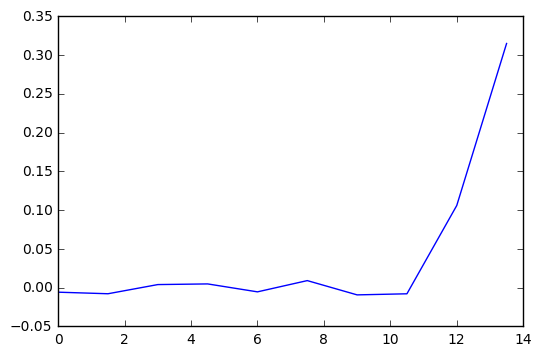

In [11]:
for i in range(N1):
    
        for j in range(i+1,N1):
        
                dSx1=(x1[i]-x1[j])**2
                dSy1=(y1[i]-y1[j])**2
                
                DD=(dSx1+dSy1)**(0.5) #Distancias y calculos para los elementos entre los arreglos
                
                indice1=int(DD/tbin) 
                
                Histo1[indice1]=Histo1[indice1]+1 #Contador de indices
                
for i in range(N2):
    
        for j in range(i+1,N2):
        
                                            
                dSx2=(x2[i]-x2[j])**2
                dSy2=(y2[i]-y2[j])**2
                                            
    
                RR=(dSx2+dSy2)**(0.5) 
                
                      
                indice2=int(RR/tbin)  
                
                Histo2[indice2]=Histo2[indice2]+1

#Obtiene las distancias (DR) entre los elementos de DD con los elementos de RR
for i in range(N1):
    
        for j in range(N2):
        
                                            
                dSx=(x1[i]-x2[j])**2
                dSy=(y1[i]-y2[j])**2
                                            
    
                DR=(dSx+dSy)**(0.5) 
                
                      
                indice3=int(DR/tbin)       
                
                Histo3[indice3]=Histo3[indice3]+1

corr_D=Histo1/nDist1
corr_R=Histo2/nDist2
corr_DR=Histo3/nDist3
                
corr= (corr_D+corr_R-2*corr_DR)/corr_R #Hace la funcion de correlacion 

plt.plot(binss,corr)
plt.show()

# 4 estimadores:

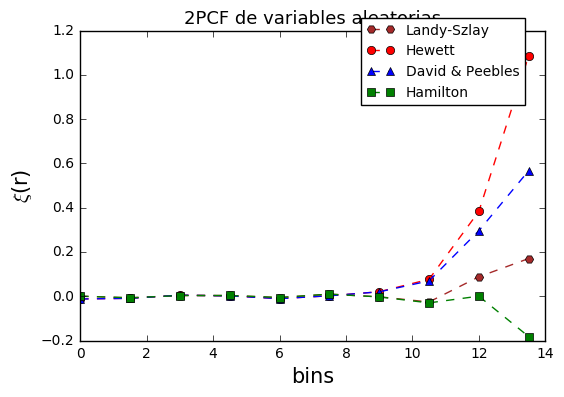

In [4]:
Cont1=np.zeros(nbins) #Inicio del contador para el histograma 
Cont2=np.zeros(nbins) #del mismo tamanio que los bins
Cont3=np.zeros(nbins)



for i in range(N1):
    
        for j in range(i+1,N1):
        
                dSx1=(x1[i]-x1[j])**2
                dSy1=(y1[i]-y1[j])**2
                
                DD=(dSx1+dSy1)**(0.5) #Distancias entre los elementos
                indice1=int(DD/tbin) 
                
                Cont1[indice1]=Cont1[indice1]+1 #Contador de indices
                
for i in range(N2):
    
        for j in range(i+1,N2):
        
                                            
                dSx2=(x2[i]-x2[j])**2
                dSy2=(y2[i]-y2[j])**2
                                            
    
                RR=(dSx2+dSy2)**(0.5) 
                
                      
                indice2=int(RR/tbin)  
                
                Cont2[indice2]=Cont2[indice2]+1

#Obtiene las distancias (DR) entre los elementos de DD con los elementos de RR

 

for i in range(N1):
    
        for j in range(N2):
        
                                            
                dSx=(x1[i]-x2[j])**2
                dSy=(y1[i]-y2[j])**2
                                            
    
                DR=(dSx+dSy)**(0.5) 
                
                      
                indice3=int(DR/tbin)       
                
                Cont3[indice3]=Cont3[indice3]+1

corr_D=Cont1/nDist1
corr_R=Cont2/nDist2
corr_DR=Cont3/nDist3


name1='Landy-Szlay'
corr1= (corr_D+corr_R-2*corr_DR)/corr_R

name2='Hewett'
corr2= (corr_D-corr_DR)/corr_R

name3='David & Peebles'
corr3= (corr_D/corr_DR)-1

name4='Hamilton'
corr4= (corr_D*corr_R)/(corr_DR)**2 -1
#------------------------------------------------------------


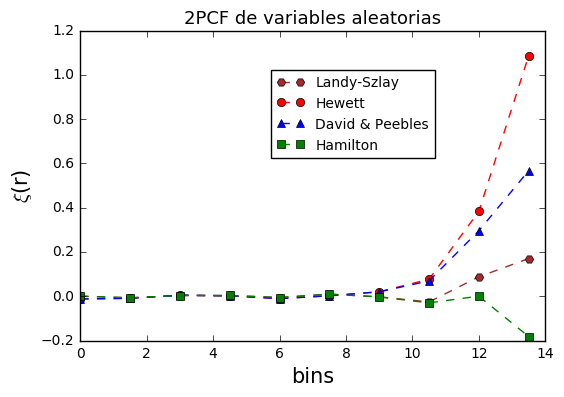

In [8]:
plt.plot(binss,corr1,'--H',label=str(name1),color='brown')
plt.plot(binss,corr2,'--o',label=str(name2),color='red')
plt.plot(binss,corr3,'--g^',label=str(name3),color='blue')
plt.plot(binss,corr4,'--s',label=str(name4),color='green')

plt.title('2PCF de variables aleatorias',fontsize=13)
plt.xlabel('bins',fontsize=15)
plt.ylabel(r'$\xi$(r)',fontsize=15)
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})


plt.show()S


# Ejercicio Fourier:
## Transformada para una funcion f(x)

In [24]:
#Calcular la trans de F usando  la definicion 
#de Transf discreta de Fourier dada por JW Cooley and John Tukey ( 1965 )

def FT(x):
    N = x.shape[0] #numero de elementos
    n = np.arange(N) #elemento actual a analizar
    k = n.reshape((N, 1)) #frecuencia
    M = np.exp(-2j * np.pi * k * n / N) #nucleo de la transformada
    return np.dot(M, x) #resultado transformada

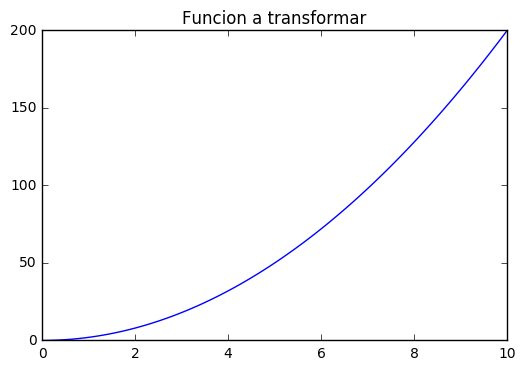

In [29]:
N=100 #numero de puntos

x=np.linspace(0,10,N) #arreglo x
y=2*x**2 #funcion (f(x))
plt.plot(x,y) #graficar
plt.title("Funcion a transformar")
plt.show()

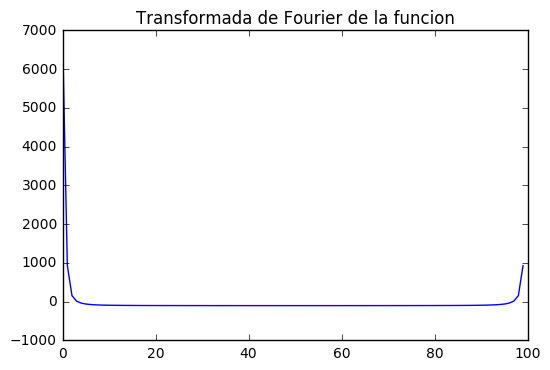

In [30]:
trans= FT(y) #Usar funcion para calcular TF

plt.plot(trans) #graficar TF
plt.title('Transformada de Fourier de la funcion')
plt.show()

# Transformada de gaussiana y comparar con FTT

In [32]:
#definir funcion gaussiana

def gauss(mu,sigma,x):
    coef =(sigma * np.sqrt(2 * np.pi))
    
    return   np.exp( - (x - mu)**2 / (2 * sigma**2) )/coef

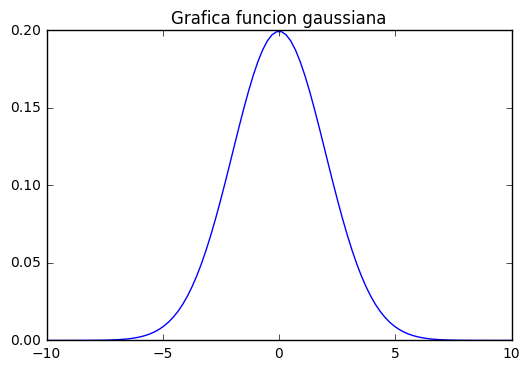

In [42]:
#parametros iniciales x
xmin=-10.0
xmax=10.
n=100

#propiedades gaussiana
mu=0
sigma=2


x= np.linspace(xmin,xmax,n)
ygauss= gauss(mu,sigma,x) #funcion de gaussiana

#graficar gaussiana normal
plt.plot(x,y)
plt.title('Grafica funcion gaussiana')
plt.show()

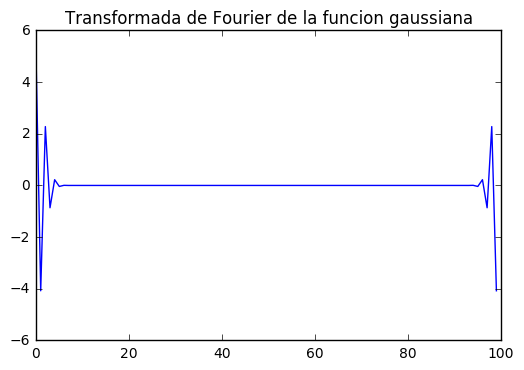

In [43]:
#Transformada fourier gaussiana

FTy= FT(ygauss)
plt.plot(FTy)
plt.title('Transformada de Fourier de la funcion gaussiana')
plt.show()

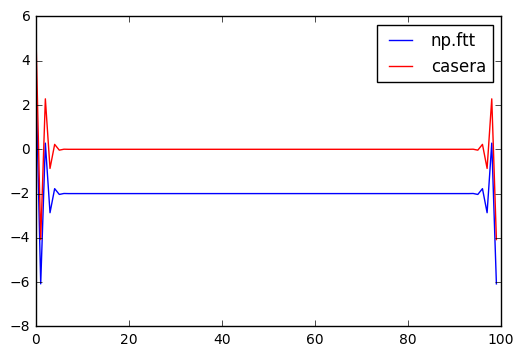

In [52]:
#comparacion transf fourier hecha vs np.ftt
#para una mejor comparacion se le sumo una constante a la casera
FTT= np.fft.fft(ygauss)
plt.plot(FTT-2, label='np.ftt',c='b')
plt.plot(FTy, label='casera', c='r')
plt.legend()
plt.show()

# Sesgo estimadores L&S y Hamilton
## L&S

Tenemos que el estimador de L&S (2D) para un numero diferente de datos en D y R:

$$\xi= 1+\frac{1}{N^2_{est}}\frac{DD}{RR}-2\frac{1}{N_{est}}\frac{DR}{RR} \,\,\,\,\,\,\,\,\,\,\,\,\,\,(1) $$

con

$$N^2_{est}= \frac{D}{R}= \frac{\int nwdV}{\int \bar{n}wdV} $$

$$= \frac{\bar{n}\int(1+\delta)wdV}{\bar{n}\int wdV} = \frac{<w>+\bar{\delta}<w>}{<w>}= 1+\bar{\delta} \,\,\,\,\,\,\,\,\,\,\,\,\,\, (2) $$

donde en (2) se utilizo la relacion $$n= \bar{n}(1+\delta). $$

Sustituyendo (2) en (1):

$$\xi^2= \frac{(1+\bar{\delta})^2+1+\psi(x_1)+\psi(x_2)+\xi_{true}(x_1,x_2)-2(1+\bar{\delta})(1+\psi(x_1))}{(1+\bar{\delta})^2} \,\,\,\,\,\,\,\,\,\, (3)$$


donde a su vez se sutituyeron las siguientes relaciones:

$$ DD= \bar{n}^2 \iint (1+\delta_1(1+\delta_2)w_1w_2dV_1dV_2$$

$$=\bar{n}^2(<<w_1 w_2>>+\psi(x_1)<<w_1 w_2>>+\psi(x_2)<<w_1 w_2>>$$
$$+\xi_{true}(x_1,x_2)<<w_1 w_2>\,\,\,\,\,\,\,\,\,\, (4) $$

$$\,$$


$$DR=\bar{n}^2(<<w_1 w_2>>+\psi(x_1)<<w_1 w_2>>)\,\,\,\,\,\,\,\,\,\, (5) $$


$$\,$$


$$RR=\bar{n}^2(<<w_1 w_2>>) \,\,\,\,\,\,\,\,\,\, (6) $$

y :

$$\psi=\frac{<<w(r)w(r)\delta(r)>>}{<<w(r)w(r)>>}\,\,\,\,\,\,\,\,\,\, (7)  $$

Simplificando (3):

$$\xi^2=  \frac{ \xi_{true}-\psi(x_1)+\psi(x_2)-2\bar{\delta}\psi(x_1)+\bar{\delta}^2}{(1+\bar{\delta})^2} \,\,\,\,\,\,\,\,\,\, (8) $$

## Hamilton

Tenemos que este estimador es:

$$ \xi^2=\frac{DD\,RR}{DR}\,\,\,\,\,\,\,\,\,\, (9)$$

entonces sustituyendo directamente el sistema (4)-(7) en (9) y simplificando algunos terminos:

$$\xi^2=\frac{1+\psi(x_1)+\psi(x_2)+\xi_{true}}{(1+\psi(x_1))^2}-1 $$

$$ =\frac{\xi_{true}+\psi(x_2)-\psi(x_1)-\psi^2(x_1)}{(1+\psi(x_1))^2} $$
